In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG,Image
print("tensorflow version",tf.__version__)

tensorflow version 2.18.0


In [2]:
images=glob("train/**/**")

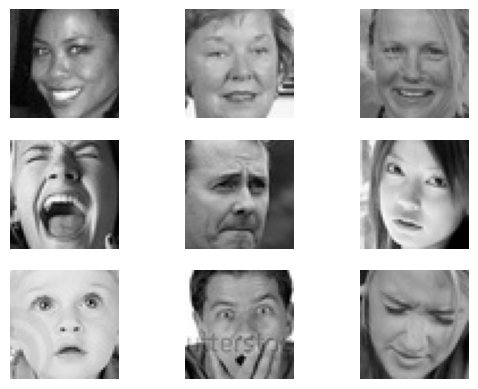

In [3]:
for i in range(9):  
    image = random.choice(images)
    plt.subplot(3, 3, i+1)  
    plt.imshow(cv2.imread(image))
    plt.axis("off")  
plt.show()

In [ ]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/", target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)

Found 28709 images belonging to 7 classes.


In [5]:
datagen_validation=ImageDataGenerator()
train_validation=datagen_validation.flow_from_directory("test/",target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)


Found 7178 images belonging to 7 classes.


In [7]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    return x
    

In [8]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    return x

In [15]:
# def model_fer(input_shape):
#     inputs=Input(input_shape)
#     conv_1=Convolution(inputs,32,(3,3))
#     conv_2=Convolution(inputs,64,(5,5))
#     conv_3=Convolution(inputs,128,(3,3))
#     flatten=Flatten()(conv_3)
#     dense_1=Dense_f(flatten,256)
#     output=Dense(7,activation="softmax")(dense_1)
#     model=Model(inputs=[inputs],outputs=[output])
#     model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
#     return model


def model_fer(input_shape):
    model = Sequential()

    model.add(Conv2D(64, (3,3), padding="same", input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.5))

    model.add(Dense(7, activation="softmax"))

    return model


In [16]:
# model=model_fer((48,48,1))
# model.summary()
model = model_fer((48,48,1))  
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

c:\Users\dinesh mishra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,096,199 (19.44 MB)

 Trainable params: 5,094,279 (19.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [20]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=train_validation.n//train_validation.batch_size
checkpoint=ModelCheckpoint("model_weights.weights.h5",monitor="val_accuracy", save_weights_only=True,mode='max',verbose=1)
callbacks=[checkpoint]

# Training our Model😊


In [21]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=train_validation,
    validation_steps=validation_steps,
    callbacks=callbacks
)

c:\Users\dinesh mishra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2434 - loss: 2.2461
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.2435 - loss: 2.2457 - val_accuracy: 0.3961 - val_loss: 1.5984
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:56 798ms/step - accuracy: 0.4219 - loss: 1.7040

c:\Users\dinesh mishra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.4219 - loss: 1.7040 - val_accuracy: 0.3954 - val_loss: 1.6092
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3455 - loss: 1.8193
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 589s 1s/step - accuracy: 0.3455 - loss: 1.8192 - val_accuracy: 0.4131 - val_loss: 1.5589
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:37 756ms/step - accuracy: 0.1875 - loss: 1.8297
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.1875 - loss: 1.8297 - val_accuracy: 0.4134 - val_loss: 1.5598
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.3855 - loss: 1.6784
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 368s 820ms/step - accuracy: 0.3855 - loss: 1.6784 - val_accuracy: 0.4402 - val_loss: 1.5150
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:29 737ms/step - a

In [22]:
model.evaluate(train_validation)

113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 133ms/step - accuracy: 0.5328 - loss: 1.2233


[1.246161937713623, 0.5280022025108337]

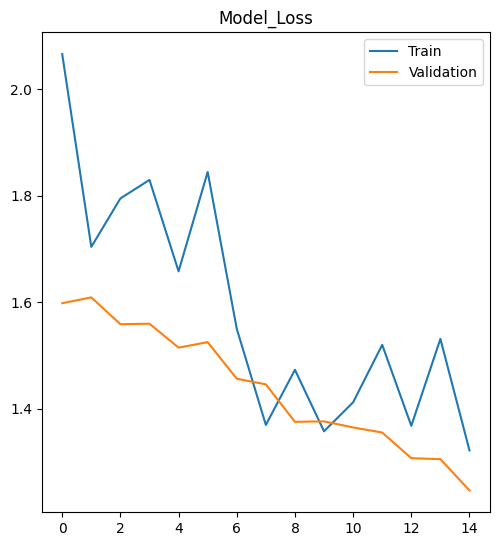

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model_Loss")
plt.legend(["Train","Validation"])
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.25,wspace=0.15)

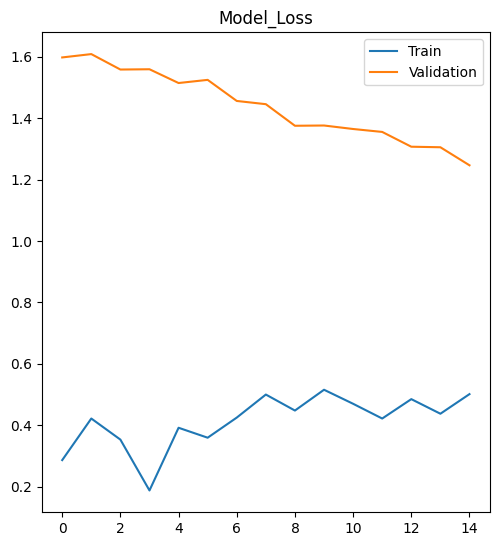

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title("Model_Loss")
plt.legend(["Train","Validation"])
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.25,wspace=0.15)

In [30]:
model_json=model.to_json()
with open("Model_file.json","w") as json_file:
    json_file.write(model_json)